# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

Сиды фиксируем для того, чтобы организовать генератор псевдослучайных чисел (ГПСЧ), то есть чтобы мы могли повторять свои эксперименты с одной и той же сгенерированной последовательностью чисел и имели точную воспроизводимость результатов.

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [3]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [4]:
# первые 5 строк
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [5]:
# последние 5 строк
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
# основные статистиски для числовых признаков тренировочного датасета
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# основные статистиски для нечисловых признаков тренировочного датасета
df_train.describe(include = ['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [8]:
# основные статистиски для числовых признаков тестового датасета
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [9]:
# основные статистиски для нечисловых признаков тестового датасета
df_test.describe(include = ['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [10]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

В тренировочном датасете есть пропуски в mileage, engine, max_power, torque, seats.

In [11]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

В тестовым датасете есть пропуски в mileage, engine, max_power, torque, seats.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [12]:
df_train_not_price = df_train.drop('selling_price', axis=1)
dup_rows = df_train_not_price[df_train_not_price.duplicated()]

print("Количество повторяющихся строк: ", dup_rows.shape[0])


Количество повторяющихся строк:  1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
dup_rows

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [14]:
# из исходной таблицы уберем строки дубликатов
df_train = df_train[~df_train.index.isin(dup_rows.index)]

df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [15]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
# your code here
df_train.reset_index(drop=True , inplace=True)

df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [17]:
# регулярное выражение для чисел
reg_num = r'([0-9]*[.,]?[0-9]+)'

df_train['mileage'] = df_train['mileage'].str.extract(reg_num).apply(pd.to_numeric)
df_train['engine'] = df_train['engine'].str.extract(reg_num).apply(pd.to_numeric)
df_train['max_power'] = df_train['max_power'].str.extract(reg_num).apply(pd.to_numeric)

df_test['mileage'] = df_test['mileage'].str.extract(reg_num).apply(pd.to_numeric)
df_test['engine'] = df_test['engine'].str.extract(reg_num).apply(pd.to_numeric)
df_test['max_power'] = df_test['max_power'].str.extract(reg_num).apply(pd.to_numeric)

Проведя анализ колонки torque можно отметить следующее:
1. torque - мощность двигателя, которая равна как крутящий момент(Nm) x обороты(rpm).
2. torque предлагается разделить на две колонки: крутящий момент и обороты.
3. В данных встречается крутящий момент которые измеряется в kgm, чтобы получить Nm нужно домножить на ускорение свободного падения g = 9.8 м/с^2.
4. В данных по оборотам встречается диапозон следующего вида: 

*   '+/-' в таком случае берем максимальное
*   '-' или '~' в таком случае берем второе значение

5. Встречаются данные без единиц измерения у крутящего момента, но проанализировав их значения я пришел к выводу что они измеряются в Nm.
6. Встречаются значения nan.
7. У оборотов тысячи могут отделяться ','.
8. Встречается значения крутящего момента в Nm и kgm. 



In [18]:
# функция для парсинга столбца torque
def parsing_torque(df):  
  # регулярное выражение для чисел
  reg_num = r'([0-9]*[.,]?[0-9]+)'

  torque = [] # крутящий момент
  max_torque_rpm = [] # обороты

  for value in df['torque']:
    # приводим для удобства значения к большой строке и удаляем ',' 
    value = str(value).upper().replace(',', '')

    if value == 'NAN':
      torque.append(None)
      max_torque_rpm.append(None)
    elif 'NM' in value and 'KGM' in value:
      # 0 значение - крутящий момент в Nm
      # 2 значение - обороты
      info = re.findall(reg_num, value)

      torque.append(float(info[0]))
      max_torque_rpm.append(float(info[2]))
    elif 'NM' in value:
      if '+' in value:
        # 0 значение - крутящий момент
        # 1 значение - обороты
        # 2 значение - обороты которые надо прибавить к 1 значению
        info = re.findall(reg_num, value)

        torque.append(float(info[0]))
        max_torque_rpm.append(float(info[1]) + float(info[2]))

      elif ('-' in value or '~' in value) and '+' not in value:
        # 0 значение - крутящий момент
        # 2 значение -  максимальное значение оборотов
        info = re.findall(reg_num, value)

        torque.append(float(info[0]))
        max_torque_rpm.append(float(info[2]))

      else:
        # 0 значение - крутящий момент
        # 1 значение - обороты (может не быть)
        info = re.findall(reg_num, value)

        torque.append(float(info[0]))

        if len(info) > 1:
          max_torque_rpm.append(float(info[1]))
        else:
          max_torque_rpm.append(None)

    elif 'KGM' in value:
      if '+' in value:
        # 0 значение - крутящий момент
        # 1 значение - обороты
        # 2 значение - обороты которые надо прибавить к 1 значению
        info = re.findall(reg_num, value)

        torque.append(float(info[0]) * 9.8)
        max_torque_rpm.append(float(info[1]) + float(info[2]))

      elif ('-' in value or '~' in value) and '+' not in value:
        # 0 значение - крутящий момент
        # 2 значение -  максимальное значение оборотов
        info = re.findall(reg_num, value)

        torque.append(float(info[0]) * 9.8)
        max_torque_rpm.append(float(info[2]))

      else:
        # 0 значение - крутящий момент
        # 1 значение - обороты (может не быть)
        info = re.findall(reg_num, value)

        torque.append(float(info[0]) * 9.8)

        if len(info) > 1:
          max_torque_rpm.append(float(info[1]))
        else:
          max_torque_rpm.append(None)
    else:
      # значение в Nm и kgm но без указания единиц измерения
      if '(' in value:
        # 0 значение - крутящий момент в Nm
        # 2 значение - обороты
        info = re.findall(reg_num, value)

        torque.append(float(info[0]))
        max_torque_rpm.append(float(info[2]))
      elif '-' in value:
        # 0 значение - крутящий момент
        # 2 значение -  максимальное значение оборотов
        info = re.findall(reg_num, value)

        torque.append(float(info[0]))
        max_torque_rpm.append(float(info[2]))
      else:
        # 0 значение - крутящий момент
        # 1 значение - обороты (может не быть)
        info = re.findall(reg_num, value)

        torque.append(float(info[0]))
        max_torque_rpm.append(float(info[1]))

  return torque, max_torque_rpm

In [19]:
torque_train, max_torque_rpm_train = parsing_torque(df_train) 
torque_test, max_torque_rpm_test = parsing_torque(df_test) 

In [20]:
assert len(torque_train) == 5840
assert len(torque_test) == 1000

assert len(max_torque_rpm_train) == 5840
assert len(max_torque_rpm_test) == 1000

In [21]:
df_train['torque'] = pd.DataFrame(torque_train)
df_train['max_torque_rpm'] = pd.DataFrame(max_torque_rpm_train)

df_test['torque'] = pd.DataFrame(torque_test)
df_test['max_torque_rpm'] = pd.DataFrame(max_torque_rpm_test)

In [22]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.52,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.70,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.10,5.0,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.00,5.0,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.70,5.0,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.20,5.0,2750.0


In [23]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260.00,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260.00,5.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172.00,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200.00,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96.00,5.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04,5.0,4500.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.70,5.0,4000.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.52,5.0,2750.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.80,5.0,4000.0


In [24]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5654.000000,5654.000000,5656.000000,5653.000000,5654.00000,5650.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.432842,1435.418111,88.103070,175.854755,5.44075,3048.213805
std,4.095622,5.354320e+05,6.007114e+04,4.051002,492.453262,32.131943,108.832806,0.99527,927.247080
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.040000,2.00000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.800000,1197.000000,68.000000,111.700000,5.00000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.00000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,100.000000,200.000000,5.00000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1862.000000,14.00000,21800.000000


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [25]:
train_median = df_train.median()


df_train = df_train.fillna(train_median)
df_test = df_test.fillna(train_median)

<ipython-input-25-10f986a1144b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_median = df_train.median()


In [26]:
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

In [27]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

Seats - признак количества сидений в машине, который лучше сделать категориальным, потому что если оставить числовым то будем иметь разный вес. С числовыми признаками хотим работать как с числами. Например, нельзя сказать что если в машине 2 сиденья то она в 2 раза меньше машины с 4 сиденьями.

In [28]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [29]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.52,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.70,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.10,5,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.00,5,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.70,5,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.20,5,2750.0


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

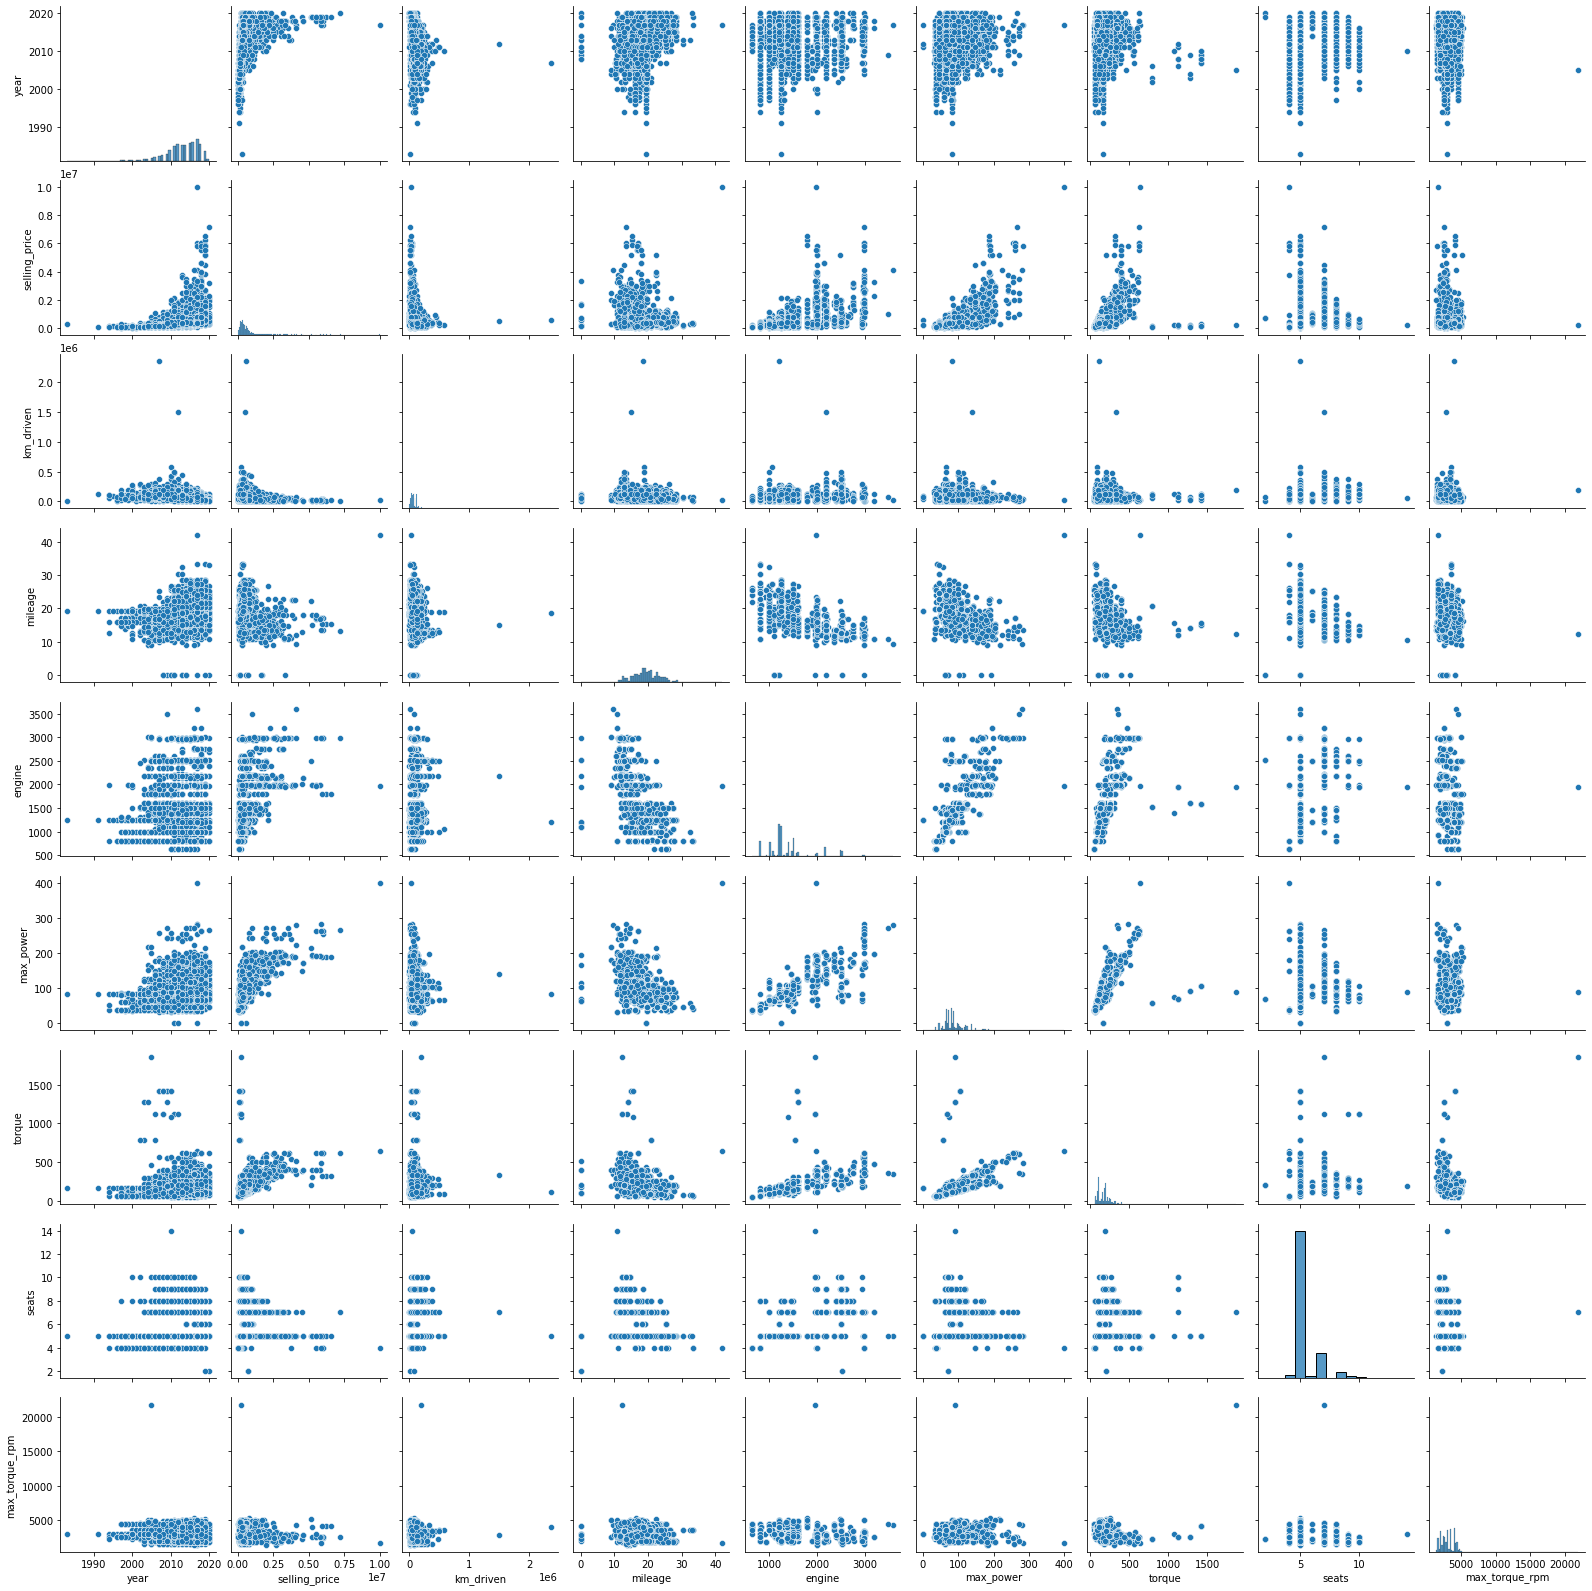

In [30]:
sns.pairplot(df_train.select_dtypes(exclude=['object']));

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

1. Можно сказать, что чем больше год, тем машина будет стоить дороже. Однако при этом могут встречаться новые машины по невысокой цене.
2. Чем меньше проехала машина по км, тем выше ее стоимость.
3. Зависимость цены от расхода топлива - слабая.
4. В целом можно сказать, что есть линейная зависимость между ценой и двигателем. Чем больше объем двигателя, тем больше стоимость машины.
5. Есть линейная зависимость между ценой и мощностью. Чем больше л.с., тем дороже стоит машина.
6. В целом можно сказать, что есть линейная зависимость между ценой и крутящим моментом. Чем больше крутящий момент, тем больше стоимость машины.
7. Зависимость цены от количество сидений - слабая.
8. Зависимость цены от количества оборотов - слабая.

Есть корреляция между признаками: engine, max_power, torque

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

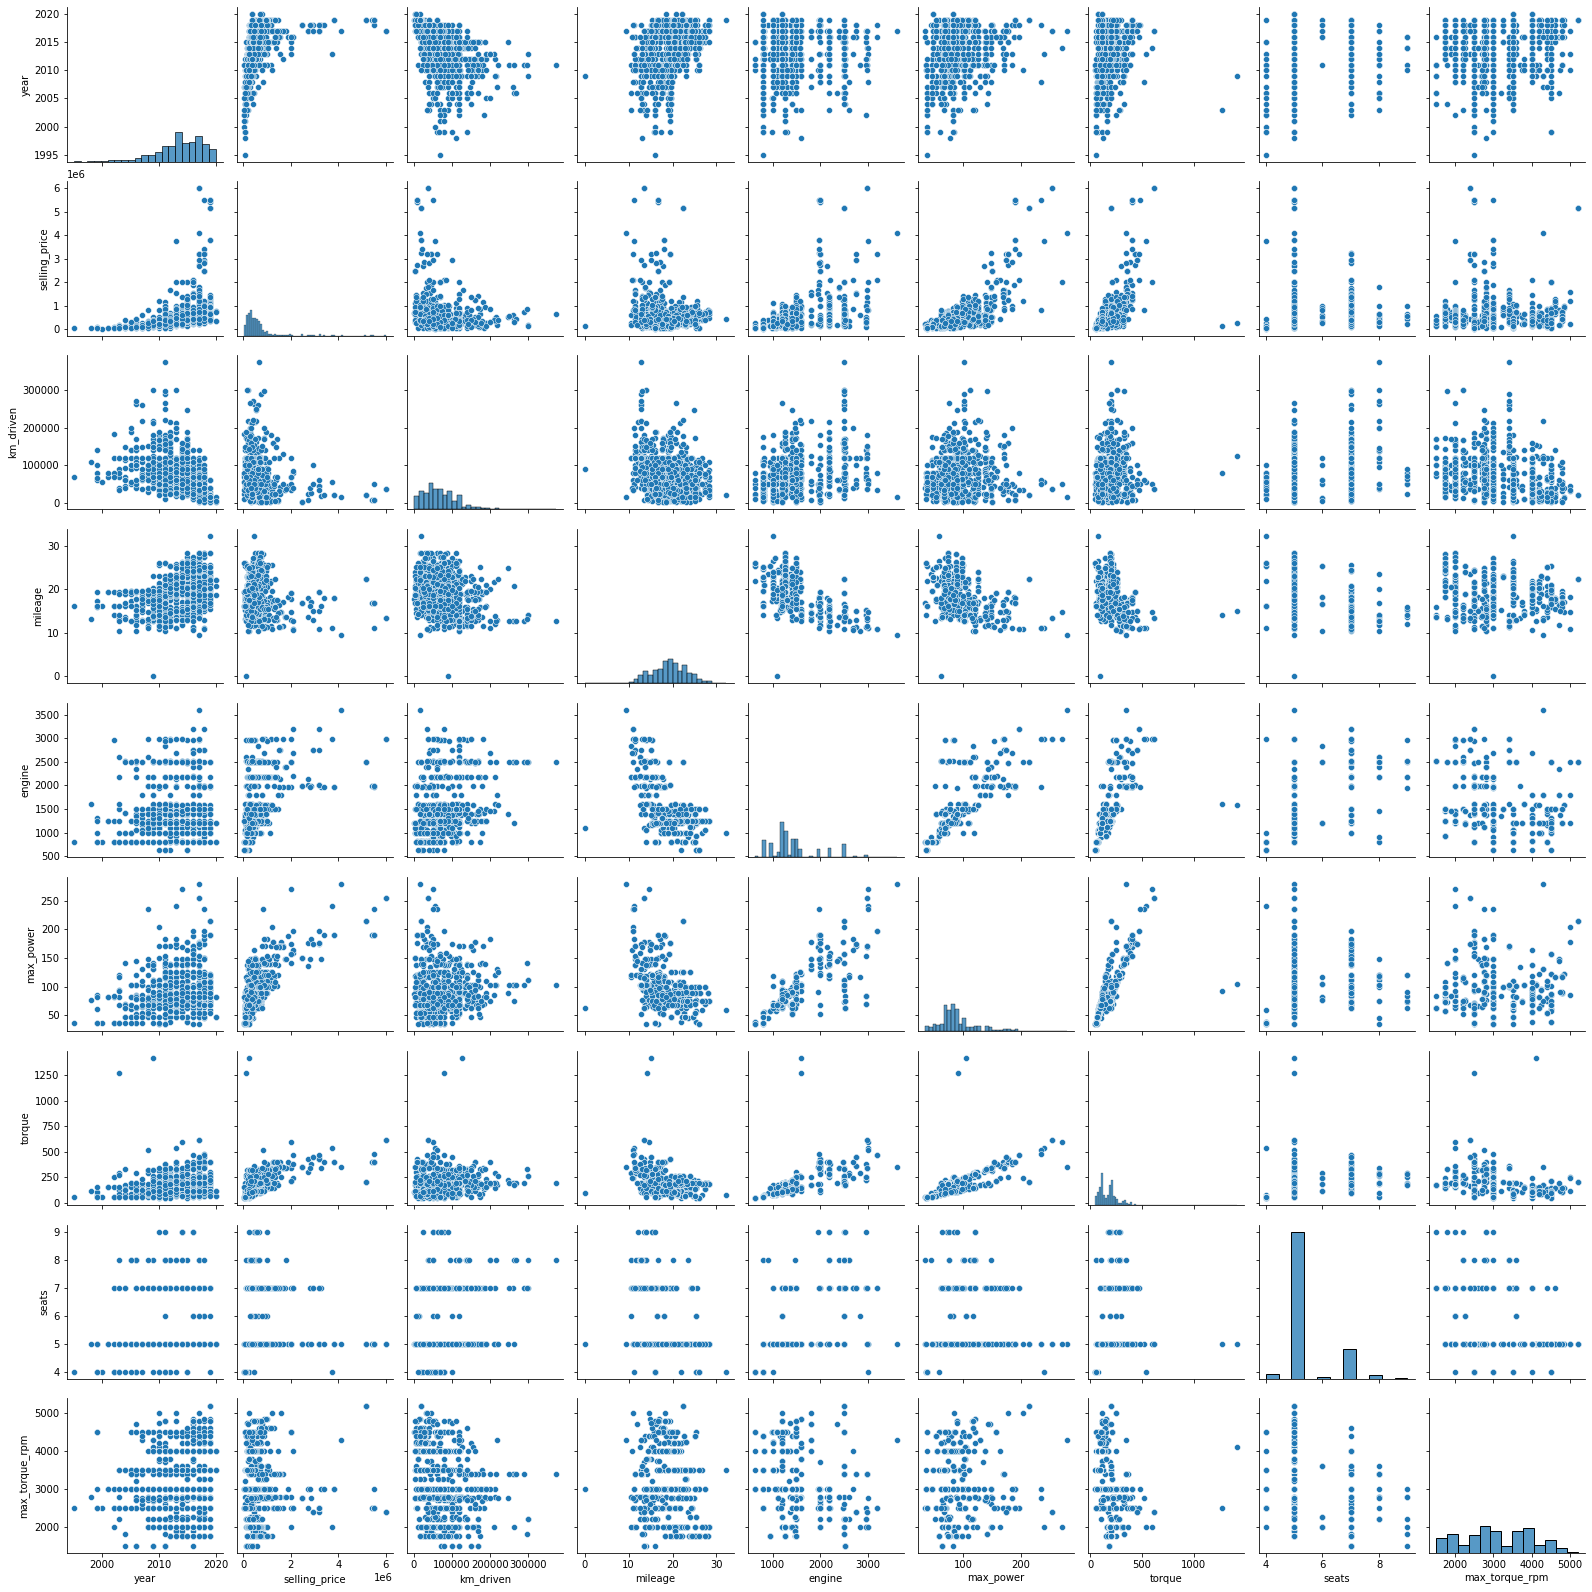

In [31]:
sns.pairplot(df_test.select_dtypes(exclude=['object']));

Визуально можно сказать что зависимости между совокупностями при разделении на трейн и тест оказались похожими.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

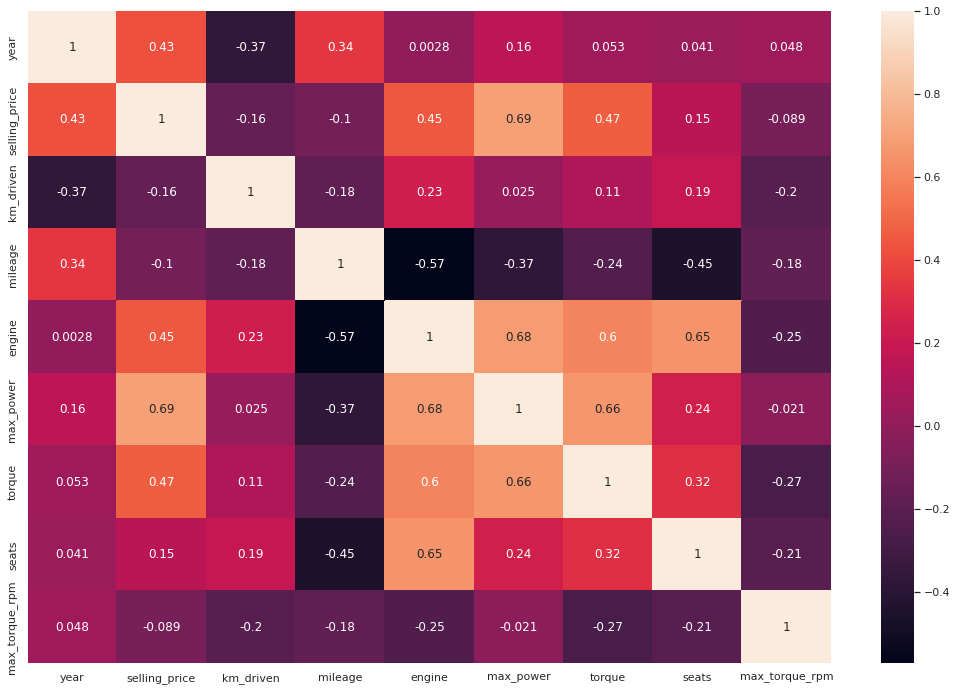

In [32]:
sns.set(rc={'figure.figsize':(18,12)})

sns.heatmap(df_train.corr(), annot = True);

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1. Меньше всего скоррелированы year и engine
2. Сильная линейная зависимость наблюдается между selling_price и max_power. А также есть зависимость между: max_power, engine, torque. Наблюдается зависимость между engine и seats.
3. Зависимость между годом и сколько километров проехала машина к дате продаже слабая. Поэтому **нельзя** утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

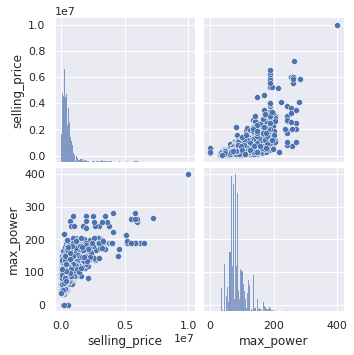

In [33]:
sns.pairplot(df_train[['selling_price', 'max_power']]);

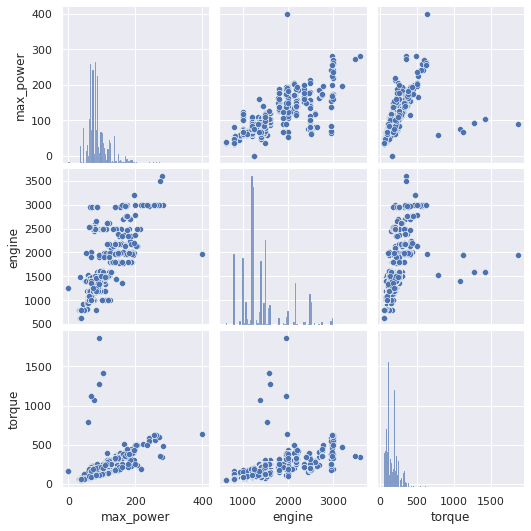

In [34]:
sns.pairplot(df_train[['max_power', 'engine', 'torque']]);

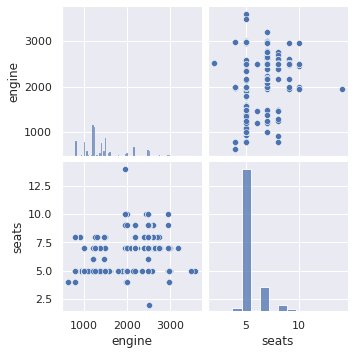

In [35]:
sns.pairplot(df_train[['engine', 'seats']]);

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Мы не рассмотрели зависимость цены от категориальных признаков

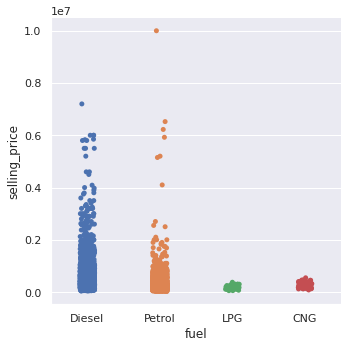

In [36]:
sns.catplot(data=df_train, x="fuel", y="selling_price");

По графику видно, что:
1. Машина на дизеле бывают подороже, чем на бензине.
2. Газомоторный транспорт дешевле всего.

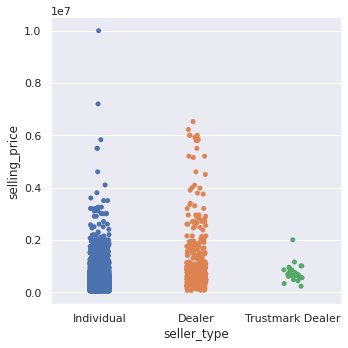

In [37]:
sns.catplot(data=df_train, x="seller_type", y="selling_price");

Визуально можно, что практически нет разницы у кого покупать машину с рук или у дилера. По trustmark dealer данных мало, чтобы сказать однозначно.

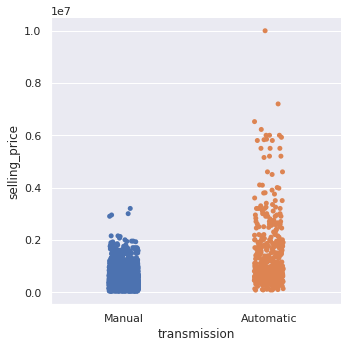

In [38]:
sns.catplot(data=df_train, x="transmission", y="selling_price");

По графику видно, что есть много машин на автоматической коробке передачи, которые дороже чем на механической.

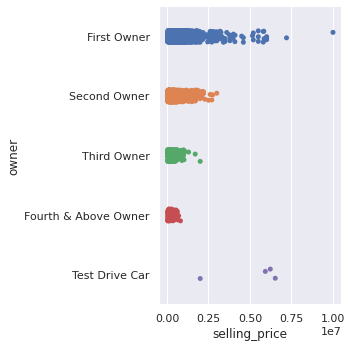

In [39]:
sns.catplot(data=df_train, x="selling_price", y="owner");

По графику можно сказать, что чем больше у машины было владелецев, тем ниже ее стоимость.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [40]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(exclude=['object']).drop('selling_price', axis=1)

In [41]:
assert X_train.shape == (5840, 8)

In [42]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(exclude=['object']).drop('selling_price', axis=1)

In [43]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [45]:
r2_score(y_train, y_pred_train)

0.6010639487597846

In [46]:
MSE(y_train, y_pred_train)

114350366838.55202

In [47]:
r2_score(y_test, y_pred_test)

0.6003006700242948

In [48]:
MSE(y_test, y_pred_test)

229758588539.5886

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [50]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [51]:
model.fit(X_train_norm, y_train)

y_pred_train_norm = model.predict(X_train_norm)
y_pred_test_norm = model.predict(X_test_norm)

In [52]:
r2_score(y_train, y_pred_train_norm)

0.6010639487597851

In [53]:
MSE(y_train, y_pred_train_norm)

114350366838.55188

In [54]:
r2_score(y_test, y_pred_test_norm)

0.6003006700242968

In [55]:
MSE(y_test, y_pred_test_norm)

229758588539.58743

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [56]:
model.coef_

array([165560.95944125, -48954.88575414,  -8239.05050406,  22530.06551283,
       328631.71528199,   7987.42360111, -30425.81137313, -58572.40640588])

In [58]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns), "Coefs", model.coef_.transpose())

coef_table

,0,Coefs
0,year,165560.959441
1,km_driven,-48954.885754
2,mileage,-8239.050504
3,engine,22530.065513
4,max_power,328631.715282
5,torque,7987.423601
6,seats,-30425.811373
7,max_torque_rpm,-58572.406406


Наибольшее влияние оказывает признак max_power

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [59]:
from sklearn.linear_model import Lasso

model_l1 = Lasso()

model_l1.fit(X_train_norm, y_train)

Lasso()

In [60]:
y_pred_train_l1 = model_l1.predict(X_train_norm)
y_pred_test_l1 = model_l1.predict(X_test_norm)

In [61]:
r2_score(y_train, y_pred_train_l1)

0.601063948712424

In [62]:
MSE(y_train, y_pred_train_l1)

114350366852.1274

In [63]:
r2_score(y_test, y_pred_test_l1)

0.6002993916743924

In [64]:
MSE(y_test, y_pred_test_l1)

229759323371.61664

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [65]:
model_l1.coef_

array([165558.76529402, -48953.94161005,  -8235.77282278,  22528.05627792,
       328633.12162844,   7986.78185083, -30421.82831979, -58570.32982845])

Видимо в Лассо случилось, что функция ошибок столкнулась квадратом на грани квадрата, а не на его уголке. 

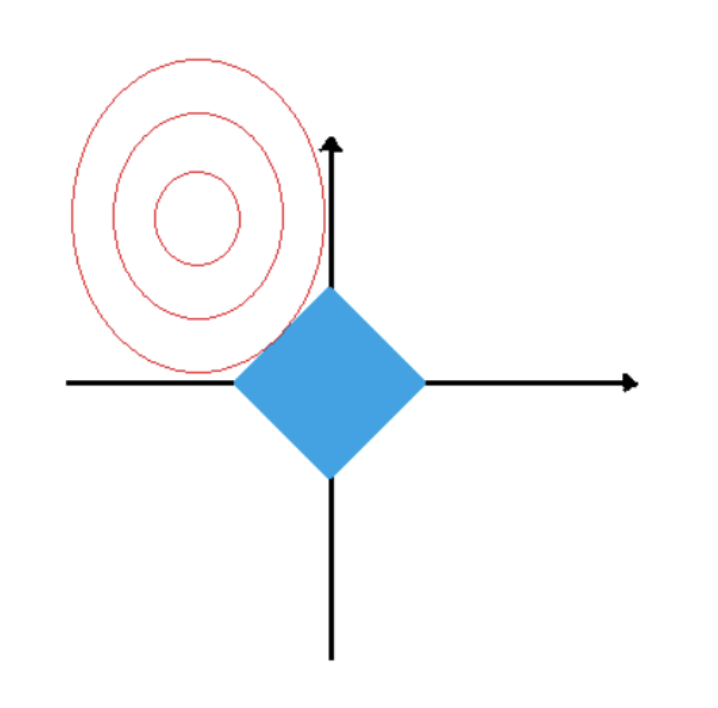

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [66]:
from sklearn.model_selection import GridSearchCV

parametrs = {'alpha': np.arange(0.1, 1.1, 0.1)}

grid = GridSearchCV(model_l1, parametrs, cv=10)
grid.fit(X_train_norm, y_train)


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

ИТОГ: количество моделей которых мы обучим с помощью данного метода: 10*10 = 100 штук. 

10 параметров на 10 фолдов

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [67]:
grid.best_params_

{'alpha': 1.0}

In [68]:
model_l1 = Lasso(alpha=grid.best_params_['alpha'])

model_l1.fit(X_train_norm, y_train)

Lasso()

In [69]:
y_pred_train_l1 = model_l1.predict(X_train_norm)
y_pred_test_l1 = model_l1.predict(X_test_norm)

In [70]:
r2_score(y_train, y_pred_train_l1)

0.601063948712424

In [71]:
MSE(y_train, y_pred_train_l1)

114350366852.1274

In [72]:
r2_score(y_test, y_pred_test_l1)

0.6002993916743924

In [73]:
MSE(y_test, y_pred_test_l1)

229759323371.61664

In [74]:
model_l1.coef_

array([165558.76529402, -48953.94161005,  -8235.77282278,  22528.05627792,
       328633.12162844,   7986.78185083, -30421.82831979, -58570.32982845])

Веса не занулились

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [75]:
from sklearn.linear_model import ElasticNet


model_elastic = ElasticNet()

parametrs = {
    'alpha': np.arange(0.1, 1.1, 0.1), 
    'l1_ratio': np.arange(0.1, 1.1, 0.1)
}

grid = GridSearchCV(model_elastic, parametrs, cv=10)
grid.fit(X_train_norm, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [76]:
grid.best_params_

{'alpha': 0.6, 'l1_ratio': 0.8}

In [77]:
model_elastic = ElasticNet(alpha=grid.best_params_['alpha'], l1_ratio=grid.best_params_['l1_ratio'])
model_elastic.fit(X_train_norm, y_train)

ElasticNet(alpha=0.6, l1_ratio=0.8)

In [78]:
y_pred_train_elastic = model_elastic.predict(X_train_norm)
y_pred_test_elastic = model_elastic.predict(X_test_norm)

In [79]:
r2_score(y_train, y_pred_train_elastic)

0.5938099491754081

In [80]:
MSE(y_train, y_pred_train_elastic)

116429641225.86653

In [81]:
r2_score(y_test, y_pred_test_elastic)

0.5731003869251055

In [82]:
MSE(y_test, y_pred_test_elastic)

245394087986.45236

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [83]:
X_train_cat = df_train.drop('name', axis=1).drop('selling_price', axis=1)

In [84]:
assert X_train_cat.shape == (5840, 12)

In [85]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [86]:
X_test_cat = df_test.drop('name', axis=1).drop('selling_price', axis=1)

In [87]:
assert X_test_cat.shape == (1000, 12)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [88]:
X_train_cat['seats'] = X_train_cat['seats'].apply(str)
X_test_cat['seats'] = X_test_cat['seats'].apply(str)

In [89]:
from sklearn.preprocessing import OneHotEncoder


ohe=OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

col_cat = ['transmission', 'seats', 'fuel', 'seller_type', 'owner']

ohe_fit = ohe.fit(X_train_cat[col_cat])

train_X_encoded = pd.DataFrame(ohe.transform(X_train_cat[col_cat]))
train_X_encoded.columns = ohe.get_feature_names_out(col_cat)

X_train_cat = pd.concat([X_train_cat.drop(col_cat, axis=1), train_X_encoded], axis=1)

test_X_encoded = pd.DataFrame(ohe.transform(X_test_cat[col_cat]))
test_X_encoded.columns = ohe.get_feature_names_out(col_cat)

X_test_cat = pd.concat([X_test_cat.drop(col_cat, axis=1), test_X_encoded], axis=1)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

Спойлер: Качество предсказаний удалось улучшить

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_cat)

X_train_cat_norm = scaler.transform(X_train_cat)
X_test_cat_norm = scaler.transform(X_test_cat)

In [91]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

model_l2 = Ridge()

parametrs = {'alpha': np.arange(0.1, 1.1, 0.1)}

grid = GridSearchCV(model_l2, parametrs, cv=10, scoring='r2')
grid.fit(X_train_cat_norm, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2')

In [92]:
grid.best_params_

{'alpha': 1.0}

In [93]:
model_l2 = Ridge(alpha=grid.best_params_['alpha'])
model_l2.fit(X_train_cat_norm, y_train)

Ridge()

In [94]:
y_pred_train_l2 = model_l2.predict(X_train_cat_norm)
y_pred_test_l2 = model_l2.predict(X_test_cat_norm)

In [95]:
r2_score(y_train, y_pred_train_l2)

0.6737738488969087

In [96]:
MSE(y_train, y_pred_train_l2)

93508921881.07889

In [97]:
r2_score(y_test, y_pred_test_l2)

0.6330777029391952

In [98]:
MSE(y_test, y_pred_test_l2)

210917414051.0027

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Было проанализированы разные способы улучшения модели, наиболее лучшие результы дало следующее:
1. Вытащить из имени машины, ее **бренд** (повысило качество лучше всего).
2. Убрать из данных выбросы по колонке max_power (те, у которых значение равно 0).
3. Использование квадрата года.
4. Сделать логарифмирование столбцов engine и max_torque_rpm.
5. Добавить столбец произведение числа "лошадей" на литр объема.

In [99]:
df_train_fe = df_train
df_test_fe = df_test

In [100]:
# убираем из данных выбросы
df_train_fe = df_train[df_train['max_power'] != 0]
df_train_fe.reset_index(drop=True , inplace=True)

In [101]:
y_train_fe = df_train_fe['selling_price']
y_test_fe = df_test_fe['selling_price']

df_train_fe = df_train_fe.drop('selling_price', axis=1)
df_test_fe = df_test_fe.drop('selling_price', axis=1)

In [102]:
# квадрат года
df_train_fe['year'] = df_train_fe['year'].apply(lambda x: x ** 2)
df_test_fe['year'] = df_test_fe['year'].apply(lambda x: x ** 2)

# логарифмирование данных
df_train_fe['engine'] = df_train_fe['engine'].apply(np.log)
df_test_fe['engine'] = df_test_fe['engine'].apply(np.log)

df_train_fe['max_torque_rpm'] = df_train_fe['max_torque_rpm'].apply(np.log)
df_test_fe['max_torque_rpm'] = df_test_fe['max_torque_rpm'].apply(np.log)

# добавление доп. столбца
df_train_fe['bhp_cc'] = df_train_fe['max_power'] * df_train_fe['engine']
df_test_fe['bhp_cc'] = df_test_fe['max_power'] * df_test_fe['engine']

In [103]:
# функция для того чтобы вытащить бренд машины
def get_brand_car(df):
  brand = []

  for car in df['name']:
    brand.append(car.split(' ')[0])

  return brand

In [104]:
df_train_fe['name'] = pd.DataFrame(get_brand_car(df_train_fe))
df_test_fe['name'] = pd.DataFrame(get_brand_car(df_test_fe))

In [105]:
df_train_fe['seats'] = df_train_fe['seats'].apply(str)
df_test_fe['seats'] = df_test_fe['seats'].apply(str)

In [106]:
ohe_fe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

col_cat = ['name', 'transmission', 'seats', 'fuel', 'seller_type', 'owner']

ohe_fe.fit(df_train_fe[col_cat])

train_X_encoded = pd.DataFrame(ohe_fe.transform(df_train_fe[col_cat]))
train_X_encoded.columns = ohe_fe.get_feature_names_out(col_cat)

X_train_fe = pd.concat([df_train_fe.drop(col_cat, axis=1), train_X_encoded], axis=1)

test_X_encoded = pd.DataFrame(ohe_fe.transform(df_test_fe[col_cat]))
test_X_encoded.columns = ohe_fe.get_feature_names_out(col_cat)

X_test_fe = pd.concat([df_test_fe.drop(col_cat, axis=1), test_X_encoded], axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [107]:
scaler_fe = StandardScaler()
scaler_fe.fit(X_train_fe)

X_train_fe_norm = scaler_fe.transform(X_train_fe)
X_test_fe_norm = scaler_fe.transform(X_test_fe)

In [108]:
model_fe = Ridge()

parametrs = {'alpha': np.arange(0.1, 1.1, 0.1)}

grid = GridSearchCV(model_fe, parametrs, cv=10, scoring='r2')
grid.fit(X_train_fe_norm, y_train_fe)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2')

In [109]:
grid.best_params_

{'alpha': 0.7000000000000001}

In [110]:
model_fe = Ridge(alpha=grid.best_params_['alpha'])
model_fe.fit(X_train_fe_norm, y_train_fe)

Ridge(alpha=0.7000000000000001)

In [111]:
y_pred_train_fe = model_fe.predict(X_train_fe_norm)
y_pred_test_fe = model_fe.predict(X_test_fe_norm)

In [112]:
r2_score(y_train_fe, y_pred_train_fe)

0.7794940524657394

In [113]:
MSE(y_train_fe, y_pred_train_fe)

63230933090.68594

In [114]:
r2_score(y_test_fe, y_pred_test_fe)

0.7910054848489787

In [115]:
MSE(y_test_fe, y_pred_test_fe)

120136015280.61855

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

Сделайте это самостоятельно для лучшей из своих моделей

In [116]:
from math import isclose

def business_score(y_true, y_pred, percent = 0.1):

  rates = 0

  for i in range(len(y_true)):
    rate = abs(y_true[i] - y_pred[i]) / y_true[i]
    if (rate < percent or isclose(rate, percent)):
      rates += 1

  return rates / len(y_true)

In [117]:
business_score(y_train_fe, y_pred_train_fe)

0.2706869967449032

In [118]:
business_score(y_test_fe, y_pred_test_fe)

0.302

Можно сделать вывод, что либо мало данных для обучения либо линейная регрессия не справляется с поставленной задачей

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Скачаем файлы весов модели после feature engineering

In [119]:
import pickle 
 

# Сохранение весов для OHE
ohe_filename = "ohe_weights.pkl" 
with open(ohe_filename, 'wb') as file: 
  pickle.dump(ohe_fe, file) 

# Сохранение весов для 
scaler_filename = "scaler_weights.pkl" 
with open(scaler_filename, 'wb') as file: 
  pickle.dump(scaler_fe, file) 
  

# Сохранение весов для 
model_filename = "model_weights.pkl" 
with open(model_filename, 'wb') as file: 
  pickle.dump(model_fe, file) 

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

Сервис написан, результаты в readme.md

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link